In [1]:
# imported packages

import random
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
import bisect
import copy
import json
import csv
import ast
import time
from scipy import special

In [2]:
#  define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'


In [4]:
files = glob.glob('AML_cumulative_risk//05072023_Fourhit_15p_10minus5//subdir_*_a//*.txt')
with open("AML_cumulative_risk//05072023_Fourhit_15p_10minus5//stored_filenames_a.json", "w") as fp:
    json.dump(files, fp)
    print("Done writing JSON data into .json file")

    
print('len(files)', len(files))


Done writing JSON data into .json file
len(files) 9900001


# Import successful events only

In [34]:
# conditioned_time_for_t4 = 70

In [107]:
dictionary_of_strings = []
# files = glob.glob('main_branch_sizes/Nmu_1_s_pt1_stochastic/clonal_tree*')
# files2 = glob.glob('AML_cumulative_risk//19062023_Fourhit_9p_10minus5//successful_events_waiting_times//instance_R*.txt'
# )
files_60_80 = glob.glob('AML_cumulative_risk//04072023_most_likely_4hit_regime//instance_R*.txt')
# files = glob.glob('main_branch_timings/Nmu_1_N_10plus6_s_10percent_s_1ons/clonal_tree*')
print(len(files_60_80))
num_data = 0
list_of_t1_with_conditioning = []
list_of_t2_with_conditioning = []
list_of_t3_with_conditioning = []
list_of_t4_with_conditioning = []
for file in files_60_80:
    with open(file) as data_file1:    
            imported_string = json.load(data_file1)
            dictionary_of_strings.append(imported_string) 
            t4 = imported_string[3]
            t3 = imported_string[2]
            t2 = imported_string[1]
            t1 = imported_string[0]
            
            if t4 != 0:
#             if t4 != 0 and t4 < conditioned_time_for_t4:            
                num_data += 1
                list_of_t1_with_conditioning.append(t1)
                list_of_t2_with_conditioning.append(t2)
                list_of_t3_with_conditioning.append(t3)
                list_of_t4_with_conditioning.append(t4)
#             print('\n', imported_list)

6528


# Import trajectories without conditioning

In [111]:
chosen_file_list = glob.glob('AML_cumulative_risk//04072023_Fourhit_15p_10minus5//subdir_2*//*.txt')

In [ ]:
def read_list_for_waiting_time_distributions(simulated_instance_filename, num_data_t1, num_data_t2, num_data_t3, num_data_t4, list_of_t1, list_of_t2, list_of_t3, list_of_t4):
    # for reading also binary mode is important
    
    with open(simulated_instance_filename, 'rb') as fp:
        t_list = json.load(fp)
        t1 = t_list[0]
        t2 = t_list[1]
        t3 = t_list[2]
        t4 = t_list[3]

        
        if t1!=0:
            num_data_t1 += 1
            list_of_t1.append(t1)
        if t2!=0:
            num_data_t2 += 1
            list_of_t2.append(t2)
        if t3!=0:
            num_data_t3 += 1
            list_of_t3.append(t3)
        if t4!=0:
            num_data_t4 += 1
            list_of_t4.append(t4)
            
            
           
        
        return num_data_t1, num_data_t2, num_data_t3, num_data_t4, list_of_t1, list_of_t2, list_of_t3, list_of_t4
    

In [1]:
num_data_t1 = 0
num_data_t2 = 0
num_data_t3 = 0
num_data_t4 = 0

list_of_t1 = []
list_of_t2 = []
list_of_t3 = []
list_of_t4 = []
num_data = 0
for simulated_instance_filename in chosen_file_list:
    num_data += 1
    num_data_t1, num_data_t2, num_data_t3, num_data_t4, list_of_t1, list_of_t2, list_of_t3, list_of_t4 = read_list_for_waiting_time_distributions(simulated_instance_filename, num_data_t1, num_data_t2, num_data_t3, num_data_t4, list_of_t1, list_of_t2, list_of_t3, list_of_t4)
    if num_data_t1%10000 == 0:
        print(num_data_t1,num_data_t2,num_data_t3,num_data_t4)
#         and  num_data_t2>5000:
#         if num_data_t3>5000 and  num_data_t4>5000:
#             break
            
# print(list_of_t1)
# print(list_of_t2)
# print(list_of_t3)
# print(list_of_t4)

In [117]:
print(len(list_of_t1))
print(len(list_of_t2))
print(len(list_of_t3))
print(len(list_of_t4))
norm_value_for_unconditioned_events = num_data
print(norm_value_for_unconditioned_events)
list_of_t1 = list_of_t1 +[0]*(norm_value_for_unconditioned_events-len(list_of_t1))

486677
442601
59473
992
538048


# Plotting waiting times 

In [118]:
scale = 1.2
def plot_waiting_times(list_of_t1, list_of_t2, list_of_t3, list_of_t4,style):  
    
    bins_without_limits = np.linspace(0, 100, 21)

    
    def tailored_to_each_list(desired_list):
        if style == 'no conditioning':
            print(style)
            normed_value = norm_value_for_unconditioned_events
        
        else:
            normed_value = len(desired_list)
        print(normed_value)
        hist, bins = np.histogram(desired_list,  bins = bins_without_limits)
        bin_centres = (bins[:-1] + bins[1:])/2
        widths = np.diff(bins)[0]   
        cum_hist = np.cumsum(hist/normed_value)
#         normalised_hist = hist/(normed_value*widths)
 
        return bin_centres, hist, bins, cum_hist
    

    bin_centres, hist, bins, cum_hist = tailored_to_each_list(list_of_t1)
    print('list_of_t1: bins', bins, 'cum_hist' ,cum_hist)
    ax1.plot([0]+list(bins[:-1]), [0]+list(cum_hist), label = '$t_1$ ', color = '#e6550d')
    ax1.fill_between([0]+list(bins[:-1]), [0]+list(cum_hist), [0]*len(bins),  color = '#fed9a6')
    
    bin_centres, hist, bins, cum_hist = tailored_to_each_list(list_of_t2)
    print('list_of_t2: bins', bins, 'cum_hist' ,cum_hist)
    ax1.plot([0]+list(bins[:-1]), [0]+list(cum_hist), label = '$t_2$ ', color = '#2ca25f')
    ax1.fill_between([0]+list(bins[:-1]), [0]+list(cum_hist), [0]*len(bins), color = '#cee6c5')
#     print('list_of_t2', cum_hist)

    bin_centres, hist, bins, cum_hist = tailored_to_each_list(list_of_t3)
    print('list_of_t3: bins', bins, 'cum_hist' ,cum_hist)
    ax1.fill_between([0]+list(bins[:-1]), [0]+list(cum_hist), [0]*len(bins), color = '#decbe4')
#     print('list_of_t3', cum_hist)
    ax1.plot([0]+list(bins[:-1]), [0]+list(cum_hist),  label = '$t_3$ ', color = '#756bb1')


    print('bin_centres', bin_centres)
    ax1.set_xlabel('age', fontsize = 15)
    x_major_ticks =   [20,40,60,80,100]
    x_major_tick_labels =  [20,40,60,80,100]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = 15)
    ax1.xaxis.set_tick_params(width=1, length = 6)
    ax1.set_xlim(0, 70)

    ax1.set_ylabel('probability', fontsize = 15, labelpad = 6*scale, fontweight = 'medium')
    y_major_ticks =   [0,0.2,0.4,0.6,0.8,1]
    y_major_tick_labels =  [0,0.2,0.4,0.6,0.8,1]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = 15)
    ax1.yaxis.set_tick_params(width=1, length = 6)
    ax1.set_ylim(0, 1)


#     print(widths, normed_value)

    return ax1


no conditioning
538048
list_of_t1: bins [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.] cum_hist [0.99334818 0.99995539 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
no conditioning
538048
list_of_t2: bins [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.] cum_hist [1.37534198e-04 7.97326633e-04 2.60943262e-03 6.71501427e-03
 1.58740484e-02 3.31141459e-02 6.39942905e-02 1.13045676e-01
 1.80816581e-01 2.61950607e-01 3.47203224e-01 4.28796316e-01
 5.03698555e-01 5.70209349e-01 6.28421628e-01 6.79149444e-01
 7.23087903e-01 7.60631022e-01 7.93550018e-01 8.22605046e-01]
no conditioning
538048
list_of_t3: bins [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.] cum_hist [0.00000000e+00 0.0000

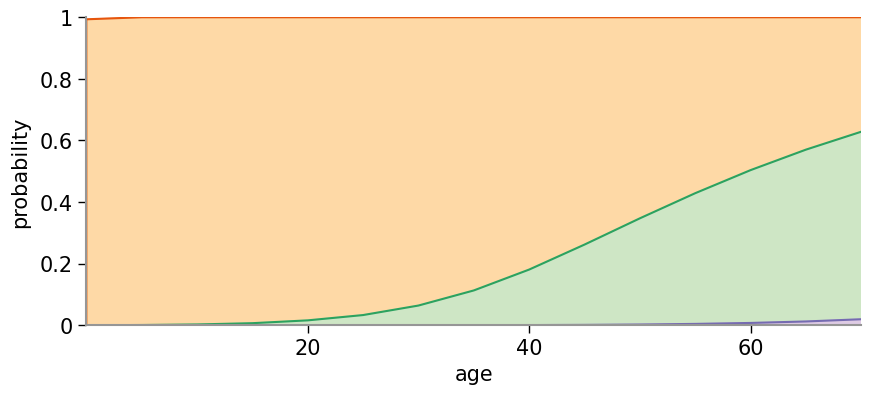

In [119]:
plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1,1, figsize=(10,4))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)

plot_waiting_times(list_of_t1, list_of_t2, list_of_t3, list_of_t4, 'no conditioning')
# plot_waiting_times(list_of_t1_with_conditioning, list_of_t2_with_conditioning, list_of_t3_with_conditioning, list_of_t4_with_conditioning,  '')


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#     ax1.spines['bottom'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)

# ax1.legend(loc='center', bbox_to_anchor=(1, 0.75), frameon=0, fontsize = 15)
#     ax1[1].set_title('4th-hit probability\n Durrett+deterministic 1st-hit' )

# plt.savefig('AML_cumulative_risk/graphs/waiting_time_for_fourhit_no_conditioning_until70gen.png', bbox_inches='tight')
# plt.savefig('AML_cumulative_risk/graphs/waiting_time_for_fourhit_conditioning_on_4hit_on60_80gen.png', bbox_inches='tight')

In [24]:
# # waiting times without conditioning
# list_of_t1 = [5740885,    7853,      10       0       0       0       0       0       0
#        0       0       0       0       0       0]
# list_of_t2 = [   5589   19446   43953   85826  156367  266628  423708  616874  815372
#   970381 1056432 1070062 1031893  960775  889651]
# list_of_t3 = [    0     1    11    29   118   358   888  1687  3362  5985 10489 17074
#  27132 40904 59909]
# bin_centres = [ 4.3 10.9 17.5 24.1 30.7 37.3 43.9 50.5 57.1 63.7 70.3 76.9 83.5 90.1
#  96.7]
# len(list_of_t1) = 14139512
# len(list_of_t2) = 8413015
# len(list_of_t3) = 167947
# len(list_of_t4) = 1081

# Risk 

In [6]:
chosen_file_list = files

In [ ]:
# Read list to memory
# simulated_instance_filename = 'AML_cumulative_risk//most_likely_4hit_regime//subdir_'+str(j)+'//instance_R_'+str(R)+'.txt'
def read_list_for_calculating_risk(simulated_instance_filename, list_of_positives_single, list_of_positives_double, list_of_positives_triple, list_of_negatives_single, list_of_negatives_double, list_of_negatives_triple):
    # for reading also binary mode is important
    with open(simulated_instance_filename, 'rb') as fp:
        t_list = json.load(fp)
        t1 = t_list[0]
        t2 = t_list[1]
        t3 = t_list[2]
        t4 = t_list[3]
        donenth = True
        
        if t4 <70 and t4!=0:
#         positives
            for index, T in enumerate([5,15,25,35,45,55,65,75,85,95]):

                    if T-5<=t1< T+5 and t1 != 0 :
                        list_of_positives_single[index] +=1
                        donenth =False
                    if T-5<= t2< T+5 and t2 !=0:
                        list_of_positives_double[index] +=1
                        donenth =False
                    if T -5 <=t3< T+5 and t3 != 0:
                        list_of_positives_triple[index] +=1
                        donenth =False
        else:
            for index, T in enumerate([5,15,25,35,45,55,65,75,85,95]):
                
                    if T-5<=t1< T+5 and t1 != 0:
                        list_of_negatives_single[index] +=1
                        donenth =False
                    if T-5<= t2< T+5 and t2 !=0:
                        list_of_negatives_double[index] +=1
                        donenth =False
                    if T -5 <=t3< T+5 and t3 != 0:
                        list_of_negatives_triple[index] +=1
                        donenth =False
#         if donenth == True:
#             print('t_list', t1, t2, t3,t4, ' not included')
        
        return list_of_positives_single, list_of_positives_double, list_of_positives_triple, list_of_negatives_single, list_of_negatives_double, list_of_negatives_triple
    

In [7]:
def evaluating_risk():

    list_of_positives_single = [0,0,0,0,0,0,0,0,0,0]
    list_of_positives_double = [0,0,0,0,0,0,0,0,0,0]
    list_of_positives_triple = [0,0,0,0,0,0,0,0,0,0]
    list_of_negatives_single = [0,0,0,0,0,0,0,0,0,0]
    list_of_negatives_double = [0,0,0,0,0,0,0,0,0,0]
    list_of_negatives_triple = [0,0,0,0,0,0,0,0,0,0]
    
    count = 0
    error = 0
    for simulated_instance_filename in chosen_file_list:
        
        try:
        
            count += 1
            if count%10000 ==0:
    #             break
                print('have read this fraction of files:', count/len(chosen_file_list)*100, '%', 'error', error)
                print(list_of_positives_single, list_of_positives_double, list_of_positives_triple, list_of_negatives_single, list_of_negatives_double, list_of_negatives_triple)
            list_of_positives_single, list_of_positives_double, list_of_positives_triple, list_of_negatives_single, list_of_negatives_double, list_of_negatives_triple= read_list_for_calculating_risk(simulated_instance_filename,list_of_positives_single, list_of_positives_double, list_of_positives_triple, list_of_negatives_single, list_of_negatives_double, list_of_negatives_triple)
        except:
            error+=1

    return list_of_positives_single, list_of_positives_double, list_of_positives_triple, list_of_negatives_single, list_of_negatives_double, list_of_negatives_triple


In [8]:
evaluating_risk()

have read this fraction of files: 0.10101009080706154 % error 0
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 1, 2, 1, 0, 0, 0, 0, 0, 0] [0, 0, 0, 1, 2, 1, 0, 0, 0, 0] [9028, 0, 0, 0, 0, 0, 0, 0, 0, 0] [8, 71, 255, 784, 1487, 1686, 1416, 11, 0, 0] [0, 0, 1, 2, 7, 31, 80, 0, 0, 0]
have read this fraction of files: 0.20202018161412308 % error 0
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 1, 2, 1, 0, 0, 0, 0, 0, 0] [0, 0, 0, 1, 2, 1, 0, 0, 0, 0] [18094, 1, 0, 0, 0, 0, 0, 0, 0, 0] [18, 141, 522, 1627, 2986, 3353, 2813, 23, 0, 0] [0, 0, 1, 4, 20, 62, 145, 3, 0, 0]
have read this fraction of files: 0.30303027242118463 % error 0
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 1, 2, 1, 0, 0, 0, 0, 0, 0] [0, 0, 0, 1, 2, 1, 0, 0, 0, 0] [27166, 1, 0, 0, 0, 0, 0, 0, 0, 0] [27, 225, 781, 2409, 4557, 4982, 4175, 40, 0, 0] [0, 0, 1, 6, 32, 98, 229, 7, 0, 0]
have read this fraction of files: 0.40404036322824616 % error 0
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 1, 2, 1, 0, 0, 0, 0, 0, 0] [0, 0, 0, 1, 2, 1, 0, 0, 0, 0] [36223, 2, 0, 0, 0, 0

have read this fraction of files: 3.030302724211846 % error 0
[15, 0, 0, 0, 0, 0, 0, 0, 0, 0] [2, 5, 7, 5, 0, 0, 0, 0, 0, 0] [0, 0, 2, 6, 9, 2, 0, 0, 0, 0] [271499, 13, 0, 0, 0, 0, 0, 0, 0, 0] [279, 1921, 7739, 24055, 44838, 49925, 42495, 379, 0, 0] [0, 1, 11, 59, 262, 944, 2435, 41, 0, 0]
have read this fraction of files: 3.131312815018908 % error 0
[15, 0, 0, 0, 0, 0, 0, 0, 0, 0] [2, 5, 7, 5, 0, 0, 0, 0, 0, 0] [0, 0, 2, 6, 9, 2, 0, 0, 0, 0] [280600, 14, 0, 0, 0, 0, 0, 0, 0, 0] [285, 1979, 7976, 24894, 46341, 51598, 43918, 391, 0, 0] [0, 1, 11, 60, 267, 977, 2510, 43, 0, 0]
have read this fraction of files: 3.2323229058259693 % error 0
[15, 0, 0, 0, 0, 0, 0, 0, 0, 0] [2, 5, 7, 5, 0, 0, 0, 0, 0, 0] [0, 0, 2, 6, 9, 2, 0, 0, 0, 0] [289642, 14, 0, 0, 0, 0, 0, 0, 0, 0] [297, 2049, 8240, 25678, 47864, 53306, 45333, 397, 0, 0] [0, 1, 11, 60, 277, 1009, 2606, 43, 0, 0]
have read this fraction of files: 3.3333329966330307 % error 0
[15, 0, 0, 0, 0, 0, 0, 0, 0, 0] [2, 5, 7, 5, 0, 0, 0, 0, 0, 0]

have read this fraction of files: 5.858585266809569 % error 0
[29, 0, 0, 0, 0, 0, 0, 0, 0, 0] [3, 11, 12, 9, 0, 0, 0, 0, 0, 0] [0, 0, 4, 9, 15, 7, 0, 0, 0, 0] [524607, 23, 0, 0, 0, 0, 0, 0, 0, 0] [524, 3644, 15015, 46567, 86889, 96734, 82122, 714, 0, 0] [0, 2, 20, 119, 502, 1818, 4616, 73, 0, 0]
have read this fraction of files: 5.95959535761663 % error 0
[29, 0, 0, 0, 0, 0, 0, 0, 0, 0] [3, 11, 12, 9, 0, 0, 0, 0, 0, 0] [0, 0, 4, 9, 15, 7, 0, 0, 0, 0] [533639, 24, 0, 0, 0, 0, 0, 0, 0, 0] [533, 3704, 15258, 47400, 88306, 98447, 83587, 722, 0, 0] [0, 2, 20, 120, 515, 1847, 4696, 73, 0, 0]
have read this fraction of files: 6.060605448423692 % error 0
[29, 0, 0, 0, 0, 0, 0, 0, 0, 0] [3, 11, 12, 9, 0, 0, 0, 0, 0, 0] [0, 0, 4, 9, 15, 7, 0, 0, 0, 0] [542670, 24, 0, 0, 0, 0, 0, 0, 0, 0] [543, 3780, 15519, 48188, 89786, 100048, 85056, 732, 0, 0] [0, 2, 21, 121, 525, 1876, 4772, 74, 0, 0]
have read this fraction of files: 6.161615539230754 % error 0
[29, 0, 0, 0, 0, 0, 0, 0, 0, 0] [3, 11, 12, 9, 

have read this fraction of files: 8.686867809407293 % error 0
[47, 0, 0, 0, 0, 0, 0, 0, 0, 0] [5, 17, 18, 15, 1, 0, 0, 0, 0, 0] [0, 0, 6, 15, 28, 7, 0, 0, 0, 0] [777894, 44, 0, 0, 0, 0, 0, 0, 0, 0] [752, 5423, 22397, 68980, 128354, 143420, 122127, 1043, 0, 0] [0, 2, 25, 166, 751, 2716, 6815, 106, 0, 0]
have read this fraction of files: 8.787877900214355 % error 0
[48, 0, 0, 0, 0, 0, 0, 0, 0, 0] [5, 17, 19, 15, 1, 0, 0, 0, 0, 0] [0, 0, 6, 16, 28, 7, 0, 0, 0, 0] [786892, 44, 0, 0, 0, 0, 0, 0, 0, 0] [761, 5490, 22652, 69783, 129900, 145096, 123585, 1055, 0, 0] [0, 2, 27, 169, 759, 2754, 6887, 107, 0, 0]
have read this fraction of files: 8.888887991021415 % error 0
[50, 0, 0, 0, 0, 0, 0, 0, 0, 0] [5, 17, 21, 15, 1, 0, 0, 0, 0, 0] [0, 0, 6, 16, 30, 7, 0, 0, 0, 0] [795914, 47, 0, 0, 0, 0, 0, 0, 0, 0] [769, 5561, 22914, 70610, 131324, 146757, 124986, 1063, 0, 0] [0, 2, 27, 171, 774, 2776, 6970, 110, 0, 0]
have read this fraction of files: 8.989898081828477 % error 0
[50, 0, 0, 0, 0, 0, 0, 0, 

have read this fraction of files: 11.414140261197954 % error 0
[63, 0, 0, 0, 0, 0, 0, 0, 0, 0] [8, 21, 25, 20, 1, 0, 0, 0, 0, 0] [0, 0, 7, 23, 34, 9, 2, 0, 0, 0] [1022237, 58, 0, 0, 0, 0, 0, 0, 0, 0] [997, 7030, 29454, 90700, 168674, 188216, 160122, 1388, 0, 0] [0, 2, 34, 229, 1026, 3518, 8935, 132, 0, 0]
have read this fraction of files: 11.515150352005014 % error 0
[63, 0, 0, 0, 0, 0, 0, 0, 0, 0] [8, 21, 25, 20, 1, 0, 0, 0, 0, 0] [0, 0, 7, 23, 34, 9, 2, 0, 0, 0] [1031291, 58, 0, 0, 0, 0, 0, 0, 0, 0] [1005, 7081, 29729, 91485, 170172, 189877, 161563, 1400, 0, 0] [0, 2, 34, 230, 1033, 3554, 9006, 132, 0, 0]
have read this fraction of files: 11.616160442812076 % error 0
[63, 0, 0, 0, 0, 0, 0, 0, 0, 0] [8, 21, 25, 20, 1, 0, 0, 0, 0, 0] [0, 0, 7, 23, 34, 9, 2, 0, 0, 0] [1040344, 58, 0, 0, 0, 0, 0, 0, 0, 0] [1015, 7147, 29959, 92278, 171707, 191522, 162987, 1418, 0, 0] [0, 2, 35, 232, 1044, 3584, 9091, 133, 0, 0]
have read this fraction of files: 11.717170533619138 % error 0
[64, 0, 0, 0, 

have read this fraction of files: 14.141412712988616 % error 0
[74, 0, 0, 0, 0, 0, 0, 0, 0, 0] [8, 27, 29, 24, 1, 0, 0, 0, 0, 0] [0, 0, 7, 31, 39, 9, 3, 0, 0, 0] [1266463, 67, 0, 0, 0, 0, 0, 0, 0, 0] [1225, 8650, 36407, 112487, 208986, 233151, 198264, 1721, 0, 0] [0, 2, 48, 271, 1279, 4368, 11067, 157, 0, 0]
have read this fraction of files: 14.242422803795677 % error 0
[74, 0, 0, 0, 0, 0, 0, 0, 0, 0] [8, 27, 29, 24, 1, 0, 0, 0, 0, 0] [0, 0, 7, 31, 39, 9, 3, 0, 0, 0] [1275495, 67, 0, 0, 0, 0, 0, 0, 0, 0] [1233, 8710, 36669, 113271, 210430, 234796, 199742, 1735, 0, 0] [0, 2, 49, 273, 1294, 4400, 11146, 157, 0, 0]
have read this fraction of files: 14.343432894602737 % error 0
[74, 0, 0, 0, 0, 0, 0, 0, 0, 0] [8, 27, 29, 25, 1, 0, 0, 0, 0, 0] [0, 0, 7, 31, 40, 9, 3, 0, 0, 0] [1284532, 68, 0, 0, 0, 0, 0, 0, 0, 0] [1239, 8759, 36926, 114121, 211966, 236484, 201164, 1751, 0, 0] [0, 2, 49, 274, 1301, 4437, 11242, 158, 0, 0]
have read this fraction of files: 14.4444429854098 % error 0
[76, 0, 0

have read this fraction of files: 16.868685164779276 % error 0
[89, 0, 0, 0, 0, 0, 0, 0, 0, 0] [9, 32, 32, 33, 1, 0, 0, 0, 0, 0] [0, 0, 8, 36, 47, 13, 3, 0, 0, 0] [1510634, 75, 0, 0, 0, 0, 0, 0, 0, 0] [1450, 10250, 43578, 134349, 249020, 278095, 236713, 2062, 0, 0] [0, 2, 57, 321, 1549, 5250, 13317, 186, 0, 0]
have read this fraction of files: 16.969695255586338 % error 0
[89, 0, 0, 0, 0, 0, 0, 0, 0, 0] [9, 32, 32, 33, 1, 0, 0, 0, 0, 0] [0, 0, 8, 36, 47, 13, 3, 0, 0, 0] [1519711, 75, 0, 0, 0, 0, 0, 0, 0, 0] [1460, 10308, 43831, 135196, 250523, 279789, 238100, 2069, 0, 0] [0, 2, 57, 323, 1557, 5277, 13403, 186, 0, 0]
have read this fraction of files: 17.0707053463934 % error 0
[89, 0, 0, 0, 0, 0, 0, 0, 0, 0] [9, 32, 32, 33, 1, 0, 0, 0, 0, 0] [0, 0, 8, 36, 47, 13, 3, 0, 0, 0] [1528722, 75, 0, 0, 0, 0, 0, 0, 0, 0] [1463, 10363, 44101, 135976, 252074, 281423, 239455, 2080, 0, 0] [0, 2, 57, 325, 1572, 5304, 13487, 188, 0, 0]
have read this fraction of files: 17.17171543720046 % error 0
[89,

have read this fraction of files: 19.595957616569937 % error 0
[106, 0, 0, 0, 0, 0, 0, 0, 0, 0] [13, 34, 39, 38, 1, 0, 0, 0, 0, 0] [0, 0, 12, 40, 56, 14, 3, 0, 0, 0] [1754853, 88, 0, 0, 0, 0, 0, 0, 0, 0] [1666, 11852, 50572, 156101, 289342, 323223, 274820, 2381, 0, 0] [0, 2, 67, 364, 1787, 6071, 15511, 223, 0, 0]
have read this fraction of files: 19.696967707377 % error 0
[108, 0, 0, 0, 0, 0, 0, 0, 0, 0] [13, 34, 41, 38, 2, 0, 0, 0, 0, 0] [0, 0, 12, 40, 57, 16, 3, 0, 0, 0] [1763929, 88, 0, 0, 0, 0, 0, 0, 0, 0] [1677, 11915, 50824, 156935, 290887, 324882, 276247, 2395, 0, 0] [0, 2, 67, 368, 1791, 6106, 15591, 223, 0, 0]
have read this fraction of files: 19.79797779818406 % error 0
[109, 0, 0, 0, 0, 0, 0, 0, 0, 0] [13, 34, 42, 38, 2, 0, 0, 0, 0, 0] [0, 0, 12, 40, 58, 16, 3, 0, 0, 0] [1772983, 88, 0, 0, 0, 0, 0, 0, 0, 0] [1690, 11972, 51081, 157758, 292425, 326544, 277659, 2405, 0, 0] [0, 2, 67, 370, 1803, 6139, 15682, 224, 0, 0]
have read this fraction of files: 19.898987888991122 % erro

have read this fraction of files: 22.3232300683606 % error 0
[121, 0, 0, 0, 0, 0, 0, 0, 0, 0] [13, 37, 46, 45, 4, 0, 0, 0, 0, 0] [0, 0, 14, 43, 61, 24, 3, 0, 0, 0] [1999002, 102, 0, 0, 0, 0, 0, 0, 0, 0] [1890, 13467, 57503, 177978, 329703, 368283, 313247, 2687, 0, 0] [0, 2, 73, 408, 2009, 6881, 17656, 254, 0, 0]
have read this fraction of files: 22.42424015916766 % error 0
[121, 0, 0, 0, 0, 0, 0, 0, 0, 0] [13, 37, 46, 46, 4, 0, 0, 0, 0, 0] [0, 0, 14, 43, 62, 24, 3, 0, 0, 0] [2008059, 102, 0, 0, 0, 0, 0, 0, 0, 0] [1901, 13521, 57780, 178805, 331158, 369916, 314704, 2697, 0, 0] [0, 2, 73, 410, 2016, 6916, 17740, 255, 0, 0]
have read this fraction of files: 22.52525024997472 % error 0
[121, 0, 0, 0, 0, 0, 0, 0, 0, 0] [13, 37, 46, 46, 4, 0, 0, 0, 0, 0] [0, 0, 14, 43, 62, 24, 3, 0, 0, 0] [2017092, 102, 0, 0, 0, 0, 0, 0, 0, 0] [1908, 13576, 58006, 179611, 332617, 371621, 316126, 2709, 0, 0] [0, 2, 74, 412, 2023, 6950, 17825, 256, 0, 0]
have read this fraction of files: 22.626260340781783 % e

have read this fraction of files: 24.9494924293442 % error 0
[143, 0, 0, 0, 0, 0, 0, 0, 0, 0] [17, 45, 51, 52, 6, 0, 0, 0, 0, 0] [0, 0, 16, 52, 71, 29, 3, 0, 0, 0] [2233792, 115, 0, 0, 0, 0, 0, 0, 0, 0] [2106, 15018, 64247, 198797, 368615, 411410, 350211, 2980, 0, 0] [0, 2, 88, 450, 2247, 7680, 19748, 285, 0, 0]
have read this fraction of files: 25.050502520151262 % error 0
[144, 0, 0, 0, 0, 0, 0, 0, 0, 0] [18, 45, 51, 52, 6, 0, 0, 0, 0, 0] [0, 0, 17, 52, 71, 29, 3, 0, 0, 0] [2242853, 115, 0, 0, 0, 0, 0, 0, 0, 0] [2113, 15067, 64495, 199577, 370122, 413037, 351610, 2989, 0, 0] [0, 2, 88, 455, 2251, 7709, 19834, 287, 0, 0]
have read this fraction of files: 25.15151261095832 % error 0
[145, 0, 0, 0, 0, 0, 0, 0, 0, 0] [19, 45, 51, 52, 6, 0, 0, 0, 0, 0] [0, 0, 17, 53, 71, 29, 3, 0, 0, 0] [2251921, 116, 0, 0, 0, 0, 0, 0, 0, 0] [2120, 15131, 64782, 200372, 371681, 414646, 353009, 2995, 0, 0] [0, 2, 89, 457, 2259, 7748, 19919, 289, 0, 0]
have read this fraction of files: 25.252522701765383 % 

have read this fraction of files: 27.5757547903278 % error 0
[165, 0, 0, 0, 0, 0, 0, 0, 0, 0] [22, 52, 58, 58, 7, 0, 0, 0, 0, 0] [0, 0, 19, 63, 78, 34, 3, 0, 0, 0] [2468982, 131, 0, 0, 0, 0, 0, 0, 0, 0] [2325, 16566, 71012, 219789, 407333, 454898, 387052, 3269, 0, 0] [0, 2, 95, 516, 2490, 8522, 21818, 313, 0, 0]
have read this fraction of files: 27.676764881134865 % error 0
[167, 0, 0, 0, 0, 0, 0, 0, 0, 0] [22, 52, 59, 58, 8, 0, 0, 0, 0, 0] [0, 0, 19, 63, 79, 35, 3, 0, 0, 0] [2477959, 132, 0, 0, 0, 0, 0, 0, 0, 0] [2328, 16618, 71249, 220572, 408872, 456528, 388410, 3283, 0, 0] [0, 2, 95, 518, 2495, 8555, 21899, 313, 0, 0]
have read this fraction of files: 27.77777497194192 % error 0
[167, 0, 0, 0, 0, 0, 0, 0, 0, 0] [22, 52, 59, 58, 8, 0, 0, 0, 0, 0] [0, 0, 19, 63, 79, 35, 3, 0, 0, 0] [2487012, 134, 0, 0, 0, 0, 0, 0, 0, 0] [2334, 16672, 71506, 221368, 410366, 458232, 389778, 3292, 0, 0] [0, 2, 95, 519, 2501, 8583, 21973, 314, 0, 0]
have read this fraction of files: 27.878785062748985 % 

have read this fraction of files: 30.2020171513114 % error 0
[177, 0, 0, 0, 0, 0, 0, 0, 0, 0] [24, 54, 62, 61, 8, 0, 0, 0, 0, 0] [0, 0, 21, 65, 84, 36, 3, 0, 0, 0] [2704091, 151, 0, 0, 0, 0, 0, 0, 0, 0] [2544, 18179, 77840, 240827, 445939, 497897, 423579, 3571, 0, 0] [0, 2, 100, 581, 2742, 9281, 23903, 340, 0, 0]
have read this fraction of files: 30.303027242118457 % error 0
[178, 0, 0, 0, 0, 0, 0, 0, 0, 0] [24, 54, 62, 62, 8, 0, 0, 0, 0, 0] [0, 0, 21, 65, 85, 36, 3, 0, 0, 0] [2713202, 151, 0, 0, 0, 0, 0, 0, 0, 0] [2552, 18234, 78107, 241654, 447456, 499528, 425037, 3579, 0, 0] [0, 2, 100, 584, 2750, 9306, 23984, 341, 0, 0]
have read this fraction of files: 30.404037332925522 % error 0
[178, 0, 0, 0, 0, 0, 0, 0, 0, 0] [24, 54, 62, 62, 8, 0, 0, 0, 0, 0] [0, 0, 21, 65, 85, 36, 3, 0, 0, 0] [2722199, 151, 0, 0, 0, 0, 0, 0, 0, 0] [2565, 18310, 78386, 242464, 448927, 501208, 426433, 3594, 0, 0] [0, 2, 101, 584, 2763, 9345, 24054, 341, 0, 0]
have read this fraction of files: 30.50504742373258

have read this fraction of files: 32.828279512295 % error 0
[192, 0, 0, 0, 0, 0, 0, 0, 0, 0] [24, 62, 68, 64, 8, 0, 0, 0, 0, 0] [0, 0, 21, 72, 91, 39, 3, 0, 0, 0] [2939203, 159, 0, 0, 0, 0, 0, 0, 0, 0] [2767, 19734, 84516, 261687, 484918, 541482, 460205, 3914, 0, 0] [0, 3, 103, 636, 2952, 10063, 25899, 378, 0, 0]
have read this fraction of files: 32.929289603102056 % error 0
[192, 0, 0, 0, 0, 0, 0, 0, 0, 0] [24, 62, 68, 64, 8, 0, 0, 0, 0, 0] [0, 0, 21, 72, 91, 39, 3, 0, 0, 0] [2948256, 160, 0, 0, 0, 0, 0, 0, 0, 0] [2778, 19797, 84762, 262474, 486401, 543142, 461633, 3923, 0, 0] [0, 3, 104, 638, 2957, 10094, 25986, 378, 0, 0]
have read this fraction of files: 33.03029969390912 % error 0
[192, 0, 0, 0, 0, 0, 0, 0, 0, 0] [24, 62, 68, 64, 8, 0, 0, 0, 0, 0] [0, 0, 21, 72, 91, 39, 3, 0, 0, 0] [2957346, 160, 0, 0, 0, 0, 0, 0, 0, 0] [2787, 19862, 85026, 263255, 487815, 544867, 463088, 3936, 0, 0] [0, 3, 104, 641, 2963, 10127, 26077, 380, 0, 0]
have read this fraction of files: 33.1313097847161

have read this fraction of files: 35.4545418732786 % error 0
[202, 0, 0, 0, 0, 0, 0, 0, 0, 0] [27, 64, 72, 67, 9, 0, 0, 0, 0, 0] [0, 0, 23, 76, 97, 40, 3, 0, 0, 0] [3174629, 172, 0, 0, 0, 0, 0, 0, 0, 0] [3019, 21318, 91353, 282417, 523314, 585223, 496925, 4217, 0, 0] [0, 3, 113, 687, 3215, 10815, 28060, 411, 0, 0]
have read this fraction of files: 35.55555196408566 % error 0
[202, 0, 0, 0, 0, 0, 0, 0, 0, 0] [27, 64, 72, 67, 9, 0, 0, 0, 0, 0] [0, 0, 23, 76, 97, 40, 3, 0, 0, 0] [3183680, 174, 0, 0, 0, 0, 0, 0, 0, 0] [3031, 21383, 91614, 283225, 524798, 586831, 498384, 4229, 0, 0] [0, 3, 113, 688, 3229, 10846, 28135, 412, 0, 0]
have read this fraction of files: 35.656562054892724 % error 0
[202, 0, 0, 0, 0, 0, 0, 0, 0, 0] [27, 64, 72, 67, 9, 0, 0, 0, 0, 0] [0, 0, 23, 76, 97, 40, 3, 0, 0, 0] [3192781, 174, 0, 0, 0, 0, 0, 0, 0, 0] [3037, 21437, 91879, 284039, 526285, 588478, 499865, 4239, 0, 0] [0, 3, 113, 689, 3246, 10883, 28216, 412, 0, 0]
have read this fraction of files: 35.757572145699

have read this fraction of files: 38.0808042342622 % error 0
[213, 0, 0, 0, 0, 0, 0, 0, 0, 0] [28, 66, 80, 70, 9, 0, 0, 0, 0, 0] [0, 0, 24, 78, 104, 44, 3, 0, 0, 0] [3409664, 188, 0, 0, 0, 0, 0, 0, 0, 0] [3234, 22890, 98083, 303310, 562018, 628673, 533845, 4558, 0, 0] [0, 3, 120, 735, 3461, 11598, 30203, 439, 0, 0]
have read this fraction of files: 38.181814325069254 % error 0
[213, 0, 0, 0, 0, 0, 0, 0, 0, 0] [28, 66, 80, 70, 9, 0, 0, 0, 0, 0] [0, 0, 24, 78, 104, 44, 3, 0, 0, 0] [3418724, 188, 0, 0, 0, 0, 0, 0, 0, 0] [3242, 22952, 98341, 304074, 563517, 630313, 535269, 4566, 0, 0] [0, 3, 120, 737, 3470, 11626, 30274, 440, 0, 0]
have read this fraction of files: 38.28282441587632 % error 0
[214, 0, 0, 0, 0, 0, 0, 0, 0, 0] [28, 66, 80, 71, 9, 0, 0, 0, 0, 0] [0, 0, 24, 78, 104, 45, 3, 0, 0, 0] [3427768, 188, 0, 0, 0, 0, 0, 0, 0, 0] [3250, 23009, 98587, 304887, 565067, 631919, 536729, 4583, 0, 0] [0, 3, 120, 739, 3479, 11662, 30347, 443, 0, 0]
have read this fraction of files: 38.383834506

have read this fraction of files: 40.7070665952458 % error 0
[235, 0, 0, 0, 0, 0, 0, 0, 0, 0] [32, 72, 89, 75, 10, 0, 0, 0, 0, 0] [0, 0, 26, 87, 114, 48, 3, 0, 0, 0] [3644834, 194, 0, 0, 0, 0, 0, 0, 0, 0] [3449, 24416, 104947, 324206, 600670, 672089, 570678, 4916, 0, 0] [0, 3, 125, 785, 3691, 12456, 32295, 473, 0, 0]
have read this fraction of files: 40.80807668605286 % error 0
[235, 0, 0, 0, 0, 0, 0, 0, 0, 0] [33, 72, 89, 75, 10, 0, 0, 0, 0, 0] [0, 0, 27, 87, 114, 48, 3, 0, 0, 0] [3653879, 194, 0, 0, 0, 0, 0, 0, 0, 0] [3457, 24466, 105189, 325022, 602130, 673793, 572074, 4926, 0, 0] [0, 3, 125, 787, 3703, 12482, 32373, 473, 0, 0]
have read this fraction of files: 40.90908677685992 % error 0
[235, 0, 0, 0, 0, 0, 0, 0, 0, 0] [33, 72, 89, 75, 10, 0, 0, 0, 0, 0] [0, 0, 27, 87, 114, 48, 3, 0, 0, 0] [3662942, 194, 0, 0, 0, 0, 0, 0, 0, 0] [3464, 24514, 105449, 325816, 603559, 675509, 573477, 4934, 0, 0] [0, 3, 125, 790, 3711, 12519, 32455, 475, 0, 0]
have read this fraction of files: 41.0100

have read this fraction of files: 43.3333289562294 % error 0
[249, 0, 0, 0, 0, 0, 0, 0, 0, 0] [33, 76, 98, 80, 11, 0, 0, 0, 0, 0] [0, 0, 27, 93, 121, 54, 3, 0, 0, 0] [3880118, 200, 0, 0, 0, 0, 0, 0, 0, 0] [3685, 25999, 111751, 344869, 639051, 715680, 607347, 5220, 0, 0] [0, 3, 133, 848, 3924, 13234, 34351, 507, 0, 0]
have read this fraction of files: 43.43433904703646 % error 0
[250, 0, 0, 0, 0, 0, 0, 0, 0, 0] [33, 76, 99, 80, 11, 0, 0, 0, 0, 0] [0, 0, 27, 94, 121, 54, 3, 0, 0, 0] [3889163, 201, 0, 0, 0, 0, 0, 0, 0, 0] [3698, 26054, 112025, 345653, 640599, 717343, 608747, 5233, 0, 0] [0, 3, 134, 850, 3931, 13272, 34427, 507, 0, 0]
have read this fraction of files: 43.53534913784352 % error 0
[253, 0, 0, 0, 0, 0, 0, 0, 0, 0] [33, 76, 102, 80, 11, 0, 0, 0, 0, 0] [0, 0, 27, 94, 122, 56, 3, 0, 0, 0] [3898229, 202, 0, 0, 0, 0, 0, 0, 0, 0] [3705, 26118, 112296, 346449, 642028, 719006, 610196, 5243, 0, 0] [0, 3, 134, 851, 3941, 13305, 34502, 510, 0, 0]
have read this fraction of files: 43.636

have read this fraction of files: 45.959591317213 % error 0
[268, 0, 0, 0, 0, 0, 0, 0, 0, 0] [34, 79, 110, 83, 12, 0, 0, 0, 0, 0] [0, 0, 28, 97, 131, 59, 3, 0, 0, 0] [4115408, 216, 0, 0, 0, 0, 0, 0, 0, 0] [3892, 27616, 118472, 365473, 677763, 759145, 644070, 5556, 0, 0] [0, 3, 138, 899, 4184, 14054, 36397, 533, 0, 0]
have read this fraction of files: 46.060601408020055 % error 0
[270, 0, 0, 0, 0, 0, 0, 0, 0, 0] [34, 80, 110, 83, 13, 0, 0, 0, 0, 0] [0, 0, 28, 97, 133, 59, 3, 0, 0, 0] [4124463, 216, 0, 0, 0, 0, 0, 0, 0, 0] [3903, 27688, 118718, 366275, 679248, 760760, 645537, 5569, 0, 0] [0, 3, 139, 903, 4190, 14078, 36490, 534, 0, 0]
have read this fraction of files: 46.16161149882712 % error 0
[270, 0, 0, 0, 0, 0, 0, 0, 0, 0] [34, 80, 110, 83, 13, 0, 0, 0, 0, 0] [0, 0, 28, 97, 133, 59, 3, 0, 0, 0] [4133494, 217, 0, 0, 0, 0, 0, 0, 0, 0] [3910, 27751, 118986, 367072, 680728, 762406, 646919, 5588, 0, 0] [0, 3, 139, 906, 4201, 14093, 36554, 534, 0, 0]
have read this fraction of files: 46.2

have read this fraction of files: 48.5858536781966 % error 0
[285, 0, 0, 0, 0, 0, 0, 0, 0, 0] [34, 85, 120, 85, 14, 0, 0, 0, 0, 0] [0, 0, 28, 103, 144, 60, 3, 0, 0, 0] [4350755, 232, 0, 0, 0, 0, 0, 0, 0, 0] [4096, 29179, 125222, 386515, 716347, 802633, 680947, 5885, 0, 0] [0, 4, 149, 945, 4437, 14849, 38375, 555, 0, 0]
have read this fraction of files: 48.68686376900366 % error 0
[286, 0, 0, 0, 0, 0, 0, 0, 0, 0] [35, 85, 120, 85, 14, 0, 0, 0, 0, 0] [0, 0, 28, 104, 144, 60, 3, 0, 0, 0] [4359821, 233, 0, 0, 0, 0, 0, 0, 0, 0] [4103, 29242, 125467, 387336, 717836, 804313, 682335, 5902, 0, 0] [0, 4, 149, 946, 4450, 14883, 38460, 559, 0, 0]
have read this fraction of files: 48.78787385981072 % error 0
[287, 0, 0, 0, 0, 0, 0, 0, 0, 0] [35, 85, 121, 85, 14, 0, 0, 0, 0, 0] [0, 0, 28, 104, 145, 60, 3, 0, 0, 0] [4368880, 233, 0, 0, 0, 0, 0, 0, 0, 0] [4115, 29298, 125719, 388112, 719358, 805956, 683721, 5915, 0, 0] [0, 4, 149, 952, 4463, 14905, 38533, 560, 0, 0]
have read this fraction of files: 4

have read this fraction of files: 51.2121160391802 % error 0
[303, 0, 0, 0, 0, 0, 0, 0, 0, 0] [35, 88, 129, 88, 17, 0, 0, 0, 0, 0] [0, 0, 28, 108, 155, 63, 3, 0, 0, 0] [4586091, 245, 0, 0, 0, 0, 0, 0, 0, 0] [4316, 30719, 131943, 407438, 755059, 846068, 717692, 6226, 0, 0] [0, 6, 157, 996, 4686, 15662, 40453, 591, 0, 0]
have read this fraction of files: 51.31312612998726 % error 0
[305, 0, 0, 0, 0, 0, 0, 0, 0, 0] [35, 88, 130, 89, 17, 0, 0, 0, 0, 0] [0, 0, 28, 108, 157, 63, 3, 0, 0, 0] [4595119, 245, 0, 0, 0, 0, 0, 0, 0, 0] [4324, 30781, 132195, 408232, 756503, 847793, 719103, 6232, 0, 0] [0, 6, 157, 996, 4695, 15690, 40541, 593, 0, 0]
have read this fraction of files: 51.414136220794326 % error 0
[305, 0, 0, 0, 0, 0, 0, 0, 0, 0] [35, 88, 130, 89, 17, 0, 0, 0, 0, 0] [0, 0, 28, 108, 157, 63, 3, 0, 0, 0] [4604169, 245, 0, 0, 0, 0, 0, 0, 0, 0] [4331, 30839, 132481, 409032, 757941, 849463, 720524, 6243, 0, 0] [0, 6, 159, 998, 4704, 15725, 40618, 594, 0, 0]
have read this fraction of files: 

have read this fraction of files: 53.8383784001638 % error 0
[314, 0, 0, 0, 0, 0, 0, 0, 0, 0] [36, 90, 135, 92, 17, 1, 0, 0, 0, 0] [0, 0, 29, 113, 160, 66, 3, 0, 0, 0] [4821231, 249, 0, 0, 0, 0, 0, 0, 0, 0] [4564, 32187, 138634, 428393, 793844, 889472, 754836, 6552, 0, 0] [0, 6, 162, 1045, 4922, 16477, 42490, 625, 0, 0]
have read this fraction of files: 53.93938849097086 % error 0
[314, 0, 0, 0, 0, 0, 0, 0, 0, 0] [36, 90, 135, 92, 17, 1, 0, 0, 0, 0] [0, 0, 29, 113, 160, 66, 3, 0, 0, 0] [4830309, 249, 0, 0, 0, 0, 0, 0, 0, 0] [4570, 32242, 138885, 429175, 795380, 891114, 756347, 6566, 0, 0] [0, 6, 162, 1049, 4928, 16511, 42581, 628, 0, 0]
have read this fraction of files: 54.04039858177793 % error 0
[315, 0, 0, 0, 0, 0, 0, 0, 0, 0] [36, 90, 136, 92, 17, 1, 0, 0, 0, 0] [0, 0, 30, 113, 160, 66, 3, 0, 0, 0] [4839380, 250, 0, 0, 0, 0, 0, 0, 0, 0] [4583, 32305, 139131, 429982, 796864, 892717, 757763, 6581, 0, 0] [0, 6, 162, 1051, 4932, 16547, 42666, 628, 0, 0]
have read this fraction of files

have read this fraction of files: 56.4646407611474 % error 0
[322, 0, 0, 0, 0, 0, 0, 0, 0, 0] [37, 92, 139, 93, 19, 1, 0, 0, 0, 0] [0, 0, 30, 116, 164, 68, 3, 0, 0, 0] [5056350, 260, 0, 0, 0, 0, 0, 0, 0, 0] [4815, 33701, 145250, 449253, 832824, 932966, 791486, 6893, 0, 0] [0, 6, 173, 1108, 5165, 17261, 44656, 649, 0, 0]
have read this fraction of files: 56.565650851954466 % error 0
[323, 0, 0, 0, 0, 0, 0, 0, 0, 0] [37, 92, 140, 93, 19, 1, 0, 0, 0, 0] [0, 0, 30, 116, 165, 68, 3, 0, 0, 0] [5065352, 260, 0, 0, 0, 0, 0, 0, 0, 0] [4825, 33751, 145501, 450015, 834355, 934582, 792920, 6908, 0, 0] [0, 6, 173, 1109, 5173, 17299, 44727, 649, 0, 0]
have read this fraction of files: 56.666660942761524 % error 0
[323, 0, 0, 0, 0, 0, 0, 0, 0, 0] [37, 92, 141, 94, 19, 1, 0, 0, 0, 0] [0, 0, 30, 116, 166, 69, 3, 0, 0, 0] [5074424, 260, 0, 0, 0, 0, 0, 0, 0, 0] [4836, 33818, 145760, 450800, 835844, 936259, 794289, 6927, 0, 0] [0, 7, 173, 1112, 5182, 17324, 44796, 654, 0, 0]
have read this fraction of fil

have read this fraction of files: 59.090903122131 % error 0
[342, 0, 0, 0, 0, 0, 0, 0, 0, 0] [39, 93, 149, 101, 19, 2, 0, 0, 0, 0] [0, 0, 31, 119, 176, 73, 4, 0, 0, 0] [5291551, 267, 0, 0, 0, 0, 0, 0, 0, 0] [5051, 35259, 151912, 470175, 871621, 976266, 828119, 7221, 0, 0] [0, 8, 181, 1165, 5401, 18092, 46638, 689, 0, 0]
have read this fraction of files: 59.19191321293806 % error 0
[344, 0, 0, 0, 0, 0, 0, 0, 0, 0] [39, 95, 149, 101, 19, 2, 0, 0, 0, 0] [0, 0, 32, 120, 176, 73, 4, 0, 0, 0] [5300607, 267, 0, 0, 0, 0, 0, 0, 0, 0] [5059, 35336, 152204, 471027, 873089, 977940, 829529, 7232, 0, 0] [0, 8, 181, 1168, 5414, 18128, 46718, 691, 0, 0]
have read this fraction of files: 59.29292330374511 % error 0
[345, 0, 0, 0, 0, 0, 0, 0, 0, 0] [39, 96, 149, 101, 19, 2, 0, 0, 0, 0] [0, 0, 33, 120, 176, 73, 4, 0, 0, 0] [5309613, 268, 0, 0, 0, 0, 0, 0, 0, 0] [5063, 35388, 152417, 471823, 874610, 979623, 830900, 7241, 0, 0] [0, 8, 181, 1168, 5423, 18158, 46791, 694, 0, 0]
have read this fraction of fil

have read this fraction of files: 61.7171654831146 % error 0
[361, 0, 0, 0, 0, 0, 0, 0, 0, 0] [41, 101, 154, 108, 20, 2, 0, 0, 0, 0] [0, 0, 36, 123, 185, 77, 5, 0, 0, 0] [5526821, 283, 0, 0, 0, 0, 0, 0, 0, 0] [5285, 36847, 158657, 490928, 910465, 1019712, 864742, 7525, 0, 0] [0, 8, 184, 1236, 5643, 18879, 48735, 724, 0, 0]
have read this fraction of files: 61.818175573921664 % error 0
[361, 0, 0, 0, 0, 0, 0, 0, 0, 0] [41, 101, 154, 108, 20, 2, 0, 0, 0, 0] [0, 0, 36, 123, 185, 77, 5, 0, 0, 0] [5535913, 283, 0, 0, 0, 0, 0, 0, 0, 0] [5296, 36903, 158922, 491779, 911967, 1021400, 866178, 7535, 0, 0] [0, 8, 184, 1236, 5652, 18912, 48812, 725, 0, 0]
have read this fraction of files: 61.919185664728715 % error 0
[361, 0, 0, 0, 0, 0, 0, 0, 0, 0] [41, 101, 154, 108, 20, 2, 0, 0, 0, 0] [0, 0, 36, 123, 185, 77, 5, 0, 0, 0] [5545009, 283, 0, 0, 0, 0, 0, 0, 0, 0] [5306, 36959, 159180, 492525, 913478, 1023079, 867615, 7549, 0, 0] [0, 8, 184, 1237, 5656, 18955, 48893, 725, 0, 0]
have read this fracti

have read this fraction of files: 64.3434278440982 % error 0
[375, 0, 0, 0, 0, 0, 0, 0, 0, 0] [43, 105, 158, 114, 21, 2, 0, 0, 0, 0] [0, 0, 38, 128, 192, 79, 6, 0, 0, 0] [5762185, 294, 0, 0, 0, 0, 0, 0, 0, 0] [5525, 38396, 165451, 511905, 949262, 1063019, 901277, 7859, 0, 0] [0, 9, 189, 1282, 5881, 19711, 50866, 753, 0, 0]
have read this fraction of files: 64.44443793490527 % error 0
[375, 0, 0, 0, 0, 0, 0, 0, 0, 0] [43, 105, 158, 114, 21, 2, 0, 0, 0, 0] [0, 0, 38, 128, 192, 79, 6, 0, 0, 0] [5771256, 294, 0, 0, 0, 0, 0, 0, 0, 0] [5533, 38448, 165727, 512709, 950746, 1064639, 902700, 7869, 0, 0] [0, 9, 189, 1285, 5886, 19743, 50945, 755, 0, 0]
have read this fraction of files: 64.54544802571232 % error 0
[375, 0, 0, 0, 0, 0, 0, 0, 0, 0] [43, 105, 158, 114, 21, 2, 0, 0, 0, 0] [0, 0, 38, 128, 192, 79, 6, 0, 0, 0] [5780326, 294, 0, 0, 0, 0, 0, 0, 0, 0] [5540, 38515, 165975, 513522, 952162, 1066308, 904109, 7889, 0, 0] [0, 9, 189, 1286, 5893, 19769, 51035, 756, 0, 0]
have read this fraction

have read this fraction of files: 66.9696902050818 % error 0
[397, 0, 0, 0, 0, 0, 0, 0, 0, 0] [45, 110, 165, 118, 25, 2, 0, 0, 0, 0] [0, 0, 40, 135, 200, 84, 6, 0, 0, 0] [5997111, 299, 0, 0, 0, 0, 0, 0, 0, 0] [5759, 39954, 172205, 532511, 988082, 1106231, 938054, 8212, 0, 0] [0, 9, 200, 1332, 6106, 20520, 53008, 788, 0, 0]
have read this fraction of files: 67.07070029588887 % error 0
[397, 0, 0, 0, 0, 0, 0, 0, 0, 0] [45, 110, 165, 118, 25, 2, 0, 0, 0, 0] [0, 0, 40, 135, 200, 84, 6, 0, 0, 0] [6006163, 300, 0, 0, 0, 0, 0, 0, 0, 0] [5769, 40020, 172461, 533311, 989598, 1107871, 939478, 8226, 0, 0] [0, 9, 200, 1333, 6112, 20553, 53098, 792, 0, 0]
have read this fraction of files: 67.17171038669592 % error 0
[398, 0, 0, 0, 0, 0, 0, 0, 0, 0] [45, 110, 166, 118, 25, 2, 0, 0, 0, 0] [0, 0, 40, 135, 200, 85, 6, 0, 0, 0] [6015238, 300, 0, 0, 0, 0, 0, 0, 0, 0] [5781, 40075, 172716, 534108, 991174, 1109517, 940889, 8240, 0, 0] [0, 9, 201, 1333, 6113, 20587, 53177, 793, 0, 0]
have read this fraction

have read this fraction of files: 69.5959525660654 % error 0
[413, 0, 0, 0, 0, 0, 0, 0, 0, 0] [45, 114, 170, 124, 26, 2, 0, 0, 0, 0] [0, 0, 40, 138, 209, 87, 7, 0, 0, 0] [6232487, 314, 0, 0, 0, 0, 0, 0, 0, 0] [6011, 41483, 178907, 553462, 1027003, 1149813, 974685, 8531, 0, 0] [0, 9, 205, 1383, 6310, 21342, 55188, 813, 0, 0]
have read this fraction of files: 69.69696265687246 % error 0
[413, 0, 0, 0, 0, 0, 0, 0, 0, 0] [45, 114, 170, 124, 26, 2, 0, 0, 0, 0] [0, 0, 40, 138, 209, 87, 7, 0, 0, 0] [6241548, 314, 0, 0, 0, 0, 0, 0, 0, 0] [6019, 41547, 179139, 554281, 1028477, 1151522, 976127, 8542, 0, 0] [0, 9, 205, 1385, 6315, 21370, 55285, 815, 0, 0]
have read this fraction of files: 69.79797274767951 % error 0
[413, 0, 0, 0, 0, 0, 0, 0, 0, 0] [45, 114, 170, 124, 26, 2, 0, 0, 0, 0] [0, 0, 40, 138, 209, 87, 7, 0, 0, 0] [6250613, 315, 0, 0, 0, 0, 0, 0, 0, 0] [6032, 41589, 179403, 555092, 1029923, 1153242, 977585, 8555, 0, 0] [0, 9, 206, 1386, 6320, 21411, 55368, 816, 0, 0]
have read this fract

have read this fraction of files: 72.12120483624193 % error 0
[436, 0, 0, 0, 0, 0, 0, 0, 0, 0] [48, 121, 177, 130, 27, 2, 0, 0, 0, 0] [0, 0, 42, 144, 219, 93, 7, 0, 0, 0] [6458557, 328, 0, 0, 0, 0, 0, 0, 0, 0] [6221, 42933, 185608, 573270, 1064165, 1191336, 1010184, 8848, 0, 0] [0, 10, 211, 1446, 6563, 22147, 57266, 839, 0, 0]
have read this fraction of files: 72.222214927049 % error 0
[437, 0, 0, 0, 0, 0, 0, 0, 0, 0] [49, 122, 177, 130, 27, 2, 0, 0, 0, 0] [0, 0, 42, 146, 219, 93, 7, 0, 0, 0] [6467612, 328, 0, 0, 0, 0, 0, 0, 0, 0] [6228, 42991, 185876, 574021, 1065686, 1192969, 1011566, 8857, 0, 0] [0, 10, 211, 1449, 6572, 22168, 57345, 840, 0, 0]
have read this fraction of files: 72.32322501785606 % error 0
[437, 0, 0, 0, 0, 0, 0, 0, 0, 0] [49, 122, 177, 130, 27, 2, 0, 0, 0, 0] [0, 0, 42, 146, 219, 93, 7, 0, 0, 0] [6476656, 329, 0, 0, 0, 0, 0, 0, 0, 0] [6235, 43064, 186109, 574802, 1067139, 1194681, 1013053, 8868, 0, 0] [0, 10, 211, 1450, 6580, 22199, 57414, 841, 0, 0]
have read this 

have read this fraction of files: 74.64645710641847 % error 0
[451, 0, 0, 0, 0, 0, 0, 0, 0, 0] [50, 127, 187, 132, 27, 2, 0, 0, 0, 0] [0, 1, 43, 153, 226, 95, 7, 0, 0, 0] [6684813, 340, 0, 0, 0, 0, 0, 0, 0, 0] [6438, 44371, 192066, 593196, 1101122, 1233204, 1045700, 9156, 0, 0] [0, 10, 220, 1497, 6776, 22906, 59298, 865, 0, 0]
have read this fraction of files: 74.74746719722553 % error 0
[452, 0, 0, 0, 0, 0, 0, 0, 0, 0] [50, 127, 188, 132, 27, 2, 0, 0, 0, 0] [0, 1, 43, 153, 227, 95, 7, 0, 0, 0] [6693810, 341, 0, 0, 0, 0, 0, 0, 0, 0] [6449, 44434, 192321, 593965, 1102625, 1234850, 1047107, 9172, 0, 0] [0, 10, 221, 1501, 6784, 22950, 59387, 868, 0, 0]
have read this fraction of files: 74.8484772880326 % error 0
[452, 0, 0, 0, 0, 0, 0, 0, 0, 0] [50, 128, 188, 132, 27, 2, 0, 0, 0, 0] [0, 1, 43, 153, 228, 95, 7, 0, 0, 0] [6702895, 341, 0, 0, 0, 0, 0, 0, 0, 0] [6460, 44491, 192586, 594805, 1104102, 1236512, 1048508, 9184, 0, 0] [0, 10, 221, 1505, 6790, 22977, 59474, 868, 0, 0]
have read this

have read this fraction of files: 77.171709376595 % error 0
[477, 0, 0, 0, 0, 0, 0, 0, 0, 0] [51, 140, 193, 139, 28, 2, 0, 0, 0, 0] [0, 1, 45, 158, 238, 104, 7, 0, 0, 0] [6911014, 354, 0, 0, 0, 0, 0, 0, 0, 0] [6635, 45883, 198468, 613128, 1138562, 1274863, 1081028, 9492, 0, 0] [0, 10, 225, 1541, 7035, 23707, 61277, 893, 0, 0]
have read this fraction of files: 77.27271946740207 % error 0
[479, 0, 0, 0, 0, 0, 0, 0, 0, 0] [52, 142, 193, 139, 28, 2, 0, 0, 0, 0] [0, 1, 45, 161, 238, 104, 7, 0, 0, 0] [6920053, 354, 0, 0, 0, 0, 0, 0, 0, 0] [6641, 45935, 198726, 613941, 1140009, 1276564, 1082422, 9500, 0, 0] [0, 10, 225, 1543, 7041, 23737, 61350, 893, 0, 0]
have read this fraction of files: 77.37372955820913 % error 0
[479, 0, 0, 0, 0, 0, 0, 0, 0, 0] [52, 142, 193, 139, 28, 2, 0, 0, 0, 0] [0, 1, 45, 161, 238, 104, 7, 0, 0, 0] [6929116, 354, 0, 0, 0, 0, 0, 0, 0, 0] [6652, 45984, 199013, 614753, 1141524, 1278193, 1083856, 9512, 0, 0] [0, 10, 226, 1545, 7046, 23769, 61437, 894, 0, 0]
have read th

have read this fraction of files: 79.69696164677154 % error 0
[495, 0, 0, 0, 0, 0, 0, 0, 0, 0] [52, 148, 200, 143, 28, 2, 0, 0, 0, 0] [0, 1, 46, 167, 246, 105, 8, 0, 0, 0] [7137362, 367, 0, 0, 0, 0, 0, 0, 0, 0] [6836, 47331, 205031, 633373, 1175738, 1316225, 1116404, 9794, 0, 0] [0, 11, 233, 1591, 7248, 24481, 63275, 913, 0, 0]
have read this fraction of files: 79.7979717375786 % error 0
[495, 0, 0, 0, 0, 0, 0, 0, 0, 0] [52, 148, 200, 143, 28, 2, 0, 0, 0, 0] [0, 1, 46, 167, 246, 105, 8, 0, 0, 0] [7146413, 367, 0, 0, 0, 0, 0, 0, 0, 0] [6842, 47391, 205291, 634198, 1177193, 1317897, 1117839, 9806, 0, 0] [0, 11, 233, 1596, 7255, 24519, 63337, 915, 0, 0]
have read this fraction of files: 79.89898182838567 % error 0
[495, 0, 0, 0, 0, 0, 0, 0, 0, 0] [52, 148, 200, 143, 28, 2, 0, 0, 0, 0] [0, 1, 46, 167, 246, 105, 8, 0, 0, 0] [7155474, 367, 0, 0, 0, 0, 0, 0, 0, 0] [6853, 47446, 205540, 635011, 1178707, 1319539, 1119313, 9814, 0, 0] [0, 11, 234, 1598, 7264, 24548, 63428, 916, 0, 0]
have read t

have read this fraction of files: 82.22221391694808 % error 0
[508, 0, 0, 0, 0, 0, 0, 0, 0, 0] [54, 153, 204, 145, 28, 2, 0, 0, 0, 0] [0, 1, 48, 173, 251, 105, 8, 0, 0, 0] [7363578, 376, 0, 0, 0, 0, 0, 0, 0, 0] [7033, 48871, 211672, 653568, 1212961, 1358019, 1151693, 10089, 0, 0] [0, 11, 245, 1642, 7476, 25292, 65332, 944, 0, 0]
have read this fraction of files: 82.32322400775514 % error 0
[510, 0, 0, 0, 0, 0, 0, 0, 0, 0] [54, 154, 204, 146, 28, 2, 0, 0, 0, 0] [0, 1, 49, 173, 252, 105, 8, 0, 0, 0] [7372627, 377, 0, 0, 0, 0, 0, 0, 0, 0] [7036, 48928, 211923, 654389, 1214476, 1359719, 1153111, 10103, 0, 0] [0, 11, 245, 1645, 7489, 25324, 65425, 946, 0, 0]
have read this fraction of files: 82.42423409856221 % error 0
[511, 0, 0, 0, 0, 0, 0, 0, 0, 0] [54, 155, 204, 146, 28, 2, 0, 0, 0, 0] [0, 1, 49, 173, 253, 105, 8, 0, 0, 0] [7381664, 377, 0, 0, 0, 0, 0, 0, 0, 0] [7042, 48991, 212169, 655233, 1215954, 1361404, 1154484, 10113, 0, 0] [0, 11, 246, 1646, 7494, 25363, 65497, 947, 0, 0]
have re

have read this fraction of files: 84.74746618712463 % error 0
[526, 0, 0, 0, 0, 0, 0, 0, 0, 0] [55, 159, 211, 149, 29, 2, 0, 0, 0, 0] [0, 1, 51, 175, 263, 107, 8, 0, 0, 0] [7589773, 387, 0, 0, 0, 0, 0, 0, 0, 0] [7212, 50381, 218030, 673860, 1250387, 1399819, 1186843, 10401, 0, 0] [0, 11, 255, 1694, 7721, 26094, 67362, 981, 0, 0]
have read this fraction of files: 84.84847627793168 % error 0
[528, 0, 0, 0, 0, 0, 0, 0, 0, 0] [55, 159, 212, 150, 29, 2, 0, 0, 0, 0] [0, 1, 51, 175, 265, 107, 8, 0, 0, 0] [7598821, 387, 0, 0, 0, 0, 0, 0, 0, 0] [7217, 50438, 218293, 674607, 1251879, 1401500, 1188309, 10416, 0, 0] [0, 11, 255, 1698, 7727, 26120, 67436, 982, 0, 0]
have read this fraction of files: 84.94948636873875 % error 0
[530, 0, 0, 0, 0, 0, 0, 0, 0, 0] [56, 159, 213, 150, 29, 2, 0, 0, 0, 0] [0, 1, 51, 177, 265, 107, 8, 0, 0, 0] [7607873, 387, 0, 0, 0, 0, 0, 0, 0, 0] [7225, 50518, 218547, 675415, 1253371, 1403168, 1189709, 10428, 0, 0] [0, 11, 255, 1704, 7732, 26153, 67523, 986, 0, 0]
have re

have read this fraction of files: 87.27271845730117 % error 0
[543, 0, 0, 0, 0, 0, 0, 0, 0, 0] [57, 163, 217, 153, 30, 2, 0, 0, 0, 0] [0, 2, 51, 179, 270, 111, 9, 0, 0, 0] [7815872, 396, 0, 0, 0, 0, 0, 0, 0, 0] [7440, 51876, 224520, 693966, 1287684, 1441522, 1222142, 10728, 0, 0] [0, 11, 266, 1737, 7941, 26858, 69360, 1014, 0, 0]
have read this fraction of files: 87.37372854810823 % error 0
[544, 0, 0, 0, 0, 0, 0, 0, 0, 0] [57, 163, 219, 153, 30, 2, 0, 0, 0, 0] [0, 2, 51, 179, 272, 111, 9, 0, 0, 0] [7824944, 396, 0, 0, 0, 0, 0, 0, 0, 0] [7447, 51919, 224791, 694773, 1289237, 1443182, 1223508, 10734, 0, 0] [0, 11, 267, 1737, 7954, 26892, 69440, 1014, 0, 0]
have read this fraction of files: 87.47473863891528 % error 0
[544, 0, 0, 0, 0, 0, 0, 0, 0, 0] [57, 163, 219, 153, 30, 2, 0, 0, 0, 0] [0, 2, 51, 179, 272, 111, 9, 0, 0, 0] [7833970, 396, 0, 0, 0, 0, 0, 0, 0, 0] [7460, 51965, 225059, 695559, 1290730, 1444842, 1224915, 10746, 0, 0] [0, 11, 268, 1738, 7962, 26926, 69518, 1015, 0, 0]
have

have read this fraction of files: 89.7979707274777 % error 0
[558, 0, 0, 0, 0, 0, 0, 0, 0, 0] [61, 163, 226, 158, 30, 2, 0, 0, 0, 0] [0, 3, 54, 180, 281, 113, 9, 0, 0, 0] [8042076, 404, 0, 0, 0, 0, 0, 0, 0, 0] [7639, 53320, 231084, 714142, 1324902, 1483063, 1257348, 11073, 0, 0] [0, 11, 271, 1788, 8182, 27593, 71397, 1036, 0, 0]
have read this fraction of files: 89.89898081828477 % error 0
[559, 0, 0, 0, 0, 0, 0, 0, 0, 0] [61, 163, 227, 158, 30, 2, 0, 0, 0, 0] [0, 3, 54, 180, 282, 113, 9, 0, 0, 0] [8051194, 404, 0, 0, 0, 0, 0, 0, 0, 0] [7645, 53382, 231356, 714893, 1326381, 1484781, 1258782, 11088, 0, 0] [0, 11, 271, 1788, 8189, 27620, 71492, 1036, 0, 0]
have read this fraction of files: 89.99999090909184 % error 0
[560, 0, 0, 0, 0, 0, 0, 0, 0, 0] [61, 163, 227, 159, 30, 2, 0, 0, 0, 0] [0, 3, 54, 180, 282, 114, 9, 0, 0, 0] [8060257, 406, 0, 0, 0, 0, 0, 0, 0, 0] [7652, 53430, 231623, 715643, 1327940, 1486446, 1260225, 11102, 0, 0] [0, 11, 271, 1792, 8197, 27648, 71584, 1038, 0, 0]
have 

have read this fraction of files: 92.32322299765424 % error 0
[575, 0, 0, 0, 0, 0, 0, 0, 0, 0] [62, 165, 237, 163, 31, 2, 0, 0, 0, 0] [0, 3, 54, 183, 291, 119, 10, 0, 0, 0] [8268192, 420, 0, 0, 0, 0, 0, 0, 0, 0] [7866, 54793, 237594, 734160, 1362530, 1524787, 1292616, 11388, 0, 0] [0, 12, 278, 1837, 8420, 28433, 73440, 1063, 0, 0]
have read this fraction of files: 92.4242330884613 % error 0
[576, 0, 0, 0, 0, 0, 0, 0, 0, 0] [62, 165, 238, 163, 31, 2, 0, 0, 0, 0] [0, 3, 54, 183, 292, 119, 10, 0, 0, 0] [8277272, 420, 0, 0, 0, 0, 0, 0, 0, 0] [7873, 54856, 237867, 734942, 1363992, 1526516, 1294031, 11403, 0, 0] [0, 12, 279, 1840, 8426, 28467, 73525, 1064, 0, 0]
have read this fraction of files: 92.52524317926837 % error 0
[577, 0, 0, 0, 0, 0, 0, 0, 0, 0] [62, 165, 238, 164, 31, 2, 0, 0, 0, 0] [0, 3, 54, 183, 292, 119, 11, 0, 0, 0] [8286311, 422, 0, 0, 0, 0, 0, 0, 0, 0] [7880, 54921, 238159, 735768, 1365525, 1528188, 1295443, 11413, 0, 0] [0, 12, 279, 1843, 8440, 28501, 73606, 1066, 0, 0]
ha

have read this fraction of files: 94.84847526783078 % error 0
[586, 0, 0, 0, 0, 0, 0, 0, 0, 0] [63, 168, 241, 167, 31, 2, 0, 0, 0, 0] [0, 3, 54, 186, 296, 122, 11, 0, 0, 0] [8494255, 435, 0, 0, 0, 0, 0, 0, 0, 0] [8091, 56295, 244175, 754329, 1399655, 1566488, 1328097, 11718, 0, 0] [0, 12, 281, 1889, 8639, 29233, 75470, 1097, 0, 0]
have read this fraction of files: 94.94948535863784 % error 0
[587, 0, 0, 0, 0, 0, 0, 0, 0, 0] [63, 169, 241, 167, 31, 2, 0, 0, 0, 0] [0, 3, 55, 186, 296, 122, 11, 0, 0, 0] [8503252, 436, 0, 0, 0, 0, 0, 0, 0, 0] [8103, 56362, 244439, 755148, 1401147, 1568136, 1329497, 11736, 0, 0] [0, 12, 282, 1890, 8652, 29260, 75556, 1098, 0, 0]
have read this fraction of files: 95.05049544944491 % error 0
[588, 0, 0, 0, 0, 0, 0, 0, 0, 0] [63, 170, 241, 167, 31, 2, 0, 0, 0, 0] [0, 3, 55, 186, 297, 122, 11, 0, 0, 0] [8512346, 436, 0, 0, 0, 0, 0, 0, 0, 0] [8112, 56425, 244674, 756000, 1402623, 1569852, 1330854, 11748, 0, 0] [0, 12, 282, 1892, 8658, 29293, 75647, 1100, 0, 0]
h

have read this fraction of files: 97.37372753800732 % error 0
[613, 0, 0, 0, 0, 0, 0, 0, 0, 0] [64, 176, 250, 176, 32, 2, 0, 0, 0, 0] [0, 3, 56, 194, 310, 126, 11, 0, 0, 0] [8720350, 446, 0, 0, 0, 0, 0, 0, 0, 0] [8309, 57813, 250603, 774566, 1437031, 1608138, 1363444, 12021, 0, 0] [0, 12, 288, 1935, 8859, 30015, 77443, 1127, 0, 0]
have read this fraction of files: 97.47473762881438 % error 0
[613, 0, 0, 0, 0, 0, 0, 0, 0, 0] [64, 176, 250, 176, 32, 2, 0, 0, 0, 0] [0, 3, 56, 194, 310, 126, 11, 0, 0, 0] [8729371, 447, 0, 0, 0, 0, 0, 0, 0, 0] [8316, 57874, 250836, 775351, 1438503, 1609865, 1364877, 12029, 0, 0] [0, 12, 288, 1937, 8869, 30043, 77510, 1128, 0, 0]
have read this fraction of files: 97.57574771962145 % error 0
[614, 0, 0, 0, 0, 0, 0, 0, 0, 0] [64, 176, 251, 176, 32, 2, 0, 0, 0, 0] [0, 3, 56, 195, 310, 126, 11, 0, 0, 0] [8738404, 447, 0, 0, 0, 0, 0, 0, 0, 0] [8325, 57926, 251078, 776158, 1440006, 1611535, 1366295, 12042, 0, 0] [0, 12, 288, 1938, 8875, 30068, 77597, 1130, 0, 0]
h

have read this fraction of files: 99.89897980818387 % error 0
[625, 0, 0, 0, 0, 0, 0, 0, 0, 0] [65, 179, 259, 177, 33, 2, 0, 0, 0, 0] [0, 3, 57, 198, 320, 126, 11, 0, 0, 0] [8946311, 462, 0, 0, 0, 0, 0, 0, 0, 0] [8535, 59327, 257093, 794537, 1474163, 1649763, 1399056, 12326, 0, 0] [0, 14, 294, 1976, 9119, 30817, 79413, 1157, 0, 0]
have read this fraction of files: 99.99998989899092 % error 0
[627, 0, 0, 0, 0, 0, 0, 0, 0, 0] [65, 179, 261, 177, 33, 2, 0, 0, 0, 0] [0, 3, 57, 199, 321, 126, 11, 0, 0, 0] [8955346, 462, 0, 0, 0, 0, 0, 0, 0, 0] [8543, 59394, 257338, 795366, 1475641, 1651380, 1400516, 12340, 0, 0] [0, 14, 294, 1978, 9127, 30845, 79487, 1159, 0, 0]


([627, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [65, 179, 261, 177, 33, 2, 0, 0, 0, 0],
 [0, 3, 57, 199, 321, 126, 11, 0, 0, 0],
 [8955348, 462, 0, 0, 0, 0, 0, 0, 0, 0],
 [8543, 59394, 257338, 795366, 1475641, 1651381, 1400516, 12340, 0, 0],
 [0, 14, 294, 1978, 9127, 30845, 79487, 1159, 0, 0])

In [51]:
def calculating_time_dependent_risk(list_of_positives, list_of_negatives):
    
    list_of_abs_risk = []

    for positives, negatives in zip(list_of_positives, list_of_negatives):
        try:
            risk_with_mutant = positives/(positives+negatives)
            list_of_abs_risk.append(risk_with_mutant)
        except:
#             list_of_abs_risk.append('Nan')
            list_of_abs_risk.append(0)
        
    return list_of_abs_risk

In [7]:
list_of_abs_risk_single_khitlessthan70 = calculating_time_dependent_risk(list_of_positives_single, list_of_negatives_single, total_sim_no)
list_of_abs_risk_double_khitlessthan70 = calculating_time_dependent_risk(list_of_positives_double, list_of_negatives_double, total_sim_no)
list_of_abs_risk_triple_khitlessthan70 = calculating_time_dependent_risk(list_of_positives_triple, list_of_negatives_triple, total_sim_no)

In [2]:
# print('list_of_abs_risk_single', list_of_abs_risk_single_khitlessthan80)
# print('list_of_abs_risk_double', list_of_abs_risk_double_khitlessthan80)
# print('list_of_abs_risk_triple', list_of_abs_risk_triple_khitlessthan80)